In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
name = []
vehicle_details = []
mileage = []
rating = []
rating_count = []
price = []
deal_status = []
link = []

for i in range(1,500):
    website = "https://www.cars.com/shopping/results/?page=" + str(i) + "&page_size=20&list_price_max=&makes[]=&maximum_distance=all&models[]=&stock_type=cpo&zip="
        
    #request to the website
    response = requests.get(website)
    
    #creating the soup object
    soup = BeautifulSoup(response.content, "html.parser")
    
    #getting all the page results in one variable
    results = soup.find_all('div', {'class':'vehicle-card'})
    
    #appending the values in the results, into the respective variables
    for result in results:
        
      
        
        #name
        try:
            name.append(result.find('p', {'class':'stock-type'}).get_text())
        except:
            name.append('Nan')
      
        #vehicle_details
        try:
            vehicle_details.append(result.find('h2').get_text())
        except:
            vehicle_details.append('Nan')
        
      #mileage
        try:
            mileage.append(result.find('div',{'class':'mileage'}).get_text())
        except:
            mileage.append('Nan')
        
      #rating
        try:
            rating.append(result.find('span',{'class':'sds-rating__count'}).get_text())
        except:
            rating.append('Nan')
        
      #number of rating counts
        try:
            rating_count.append(result.find('span',{'class':'sds-rating__link sds-button-link'}).get_text())
        except:
            rating_count.append('Nan')
        
      #car price
        try:
            price.append(result.find('span',{'class':'primary-price'}).get_text())
        except:
            price.append('Nan')
        
      #deal status
        try:
            deal_status.append(result.find('span',{'class':'sds-badge__label'}).get_text())
        except:
            deal_status.append('Nan')

In [33]:
len(name)

10122

In [28]:
Name = name[20123:40246]

In [29]:
len(Name)

20123

In [34]:
len(vehicle_details)

10122

In [35]:
len(mileage)

10122

In [36]:
len(rating)

10122

In [37]:
len(rating_count)

10122

In [38]:
len(price)

10122

In [39]:
len(deal_status)

10122

In [40]:
df = pd.DataFrame({
    'Name': name,
    'Vehicle_details': vehicle_details,
    'Mileage': mileage,
    'Rating' : rating,
    'Rating-Count' : rating_count,
    'Price' : price,
    'Deal-Status' : deal_status
})

In [41]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status
0,Chevrolet Certified,2018 Chevrolet Traverse Premier,"53,969 mi.",Nan,(2 reviews),"$35,854","Great Deal | $2,831 under"
1,Ford Certified,2018 Ford Edge SEL,"35,115 mi.",4.5,(23 reviews),"$28,592",Good Deal | $497 under
2,Kia Certified,2022 Kia Carnival SX Prestige,"26,630 mi.",Nan,(3 reviews),"$50,668","Great Deal | $3,880 under"
3,Acura Certified,2020 Acura TLX V6 Advance,"19,097 mi.",5.0,(359 reviews),"$39,958",Good Deal
4,Volkswagen Certified,2016 Volkswagen Touareg TDI Lux,"64,426 mi.",4.4,(313 reviews),"$31,586","Great Deal | $3,917 under"
...,...,...,...,...,...,...,...
10117,Kia Certified,2018 Kia Forte LX,"39,169 mi.",4.8,"(2,765 reviews)","$21,000",Fair Deal
10118,GMC Certified,2021 GMC Acadia SLE,"13,968 mi.",4.6,(25 reviews),"$28,600",Good Deal | $829 under
10119,Chevrolet Certified,2020 Chevrolet Traverse LT Leather,"24,085 mi.",3.4,(894 reviews),"$36,988","Great Deal | $2,172 under"
10120,Dodge Certified,2020 Dodge Durango SXT,"34,474 mi.",3.0,(888 reviews),"$31,995",Good Deal | $334 under


In [42]:
df['Name'].value_counts()

Toyota Certified           1056
Ford Certified             1006
BMW Certified               827
Chevrolet Certified         687
Honda Certified             598
Porsche Certified           567
Cadillac Certified          532
Volvo Certified             508
GMC Certified               504
Volkswagen Certified        475
Kia Certified               449
Nissan Certified            386
Jeep Certified              385
INFINITI Certified          364
RAM Certified               358
Acura Certified             330
Dodge Certified             225
Subaru Certified            213
Buick Certified             146
Mercedes-Benz Certified     138
Chrysler Certified           78
Maserati Certified           70
Rolls-Royce Certified        55
Ferrari Certified            53
Bentley Certified            38
Aston Martin Certified       27
Alfa Romeo Certified         21
MINI Certified               16
FIAT Certified                8
Mitsubishi Certified          2
Name: Name, dtype: int64

In [43]:
df['Rating-Count'] =  df['Rating-Count'].apply(lambda x : x.strip('(').strip(')'))

In [44]:
df['Rating-Count'] =  df['Rating-Count'].apply(lambda x : x.strip('reviews'))

In [45]:
df['Mileage'] = df['Mileage'].apply(lambda x : x.strip('mi.'))

In [46]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [47]:
df['Name'] = df['Name'].str.replace('Certified', '')

In [48]:
df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status
0,Chevrolet,2018 Chevrolet Traverse Premier,"53,969",Nan,2,"35,854","Great Deal | $2,831 under"
1,Ford,2018 Ford Edge SEL,"35,115",4.5,23,"28,592",Good Deal | $497 under
2,Kia,2022 Kia Carnival SX Prestige,"26,630",Nan,3,"50,668","Great Deal | $3,880 under"
3,Acura,2020 Acura TLX V6 Advance,"19,097",5.0,359,"39,958",Good Deal
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,"64,426",4.4,313,"31,586","Great Deal | $3,917 under"


In [49]:
df['Name'].value_counts()

Toyota            1056
Ford              1006
BMW                827
Chevrolet          687
Honda              598
Porsche            567
Cadillac           532
Volvo              508
GMC                504
Volkswagen         475
Kia                449
Nissan             386
Jeep               385
INFINITI           364
RAM                358
Acura              330
Dodge              225
Subaru             213
Buick              146
Mercedes-Benz      138
Chrysler            78
Maserati            70
Rolls-Royce         55
Ferrari             53
Bentley             38
Aston Martin        27
Alfa Romeo          21
MINI                16
FIAT                 8
Mitsubishi           2
Name: Name, dtype: int64

In [50]:
df.shape

(10122, 7)

In [51]:
df['Year'] = (df['Vehicle_details'].str.extract(r'(?P<Year>\d+(?:\.\d+)?)')
                 .applymap(str.strip))

In [52]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year
0,Chevrolet,2018 Chevrolet Traverse Premier,"53,969",Nan,2,"35,854","Great Deal | $2,831 under",2018
1,Ford,2018 Ford Edge SEL,"35,115",4.5,23,"28,592",Good Deal | $497 under,2018
2,Kia,2022 Kia Carnival SX Prestige,"26,630",Nan,3,"50,668","Great Deal | $3,880 under",2022
3,Acura,2020 Acura TLX V6 Advance,"19,097",5.0,359,"39,958",Good Deal,2020
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,"64,426",4.4,313,"31,586","Great Deal | $3,917 under",2016
...,...,...,...,...,...,...,...,...
10117,Kia,2018 Kia Forte LX,"39,169",4.8,"2,765","21,000",Fair Deal,2018
10118,GMC,2021 GMC Acadia SLE,"13,968",4.6,25,"28,600",Good Deal | $829 under,2021
10119,Chevrolet,2020 Chevrolet Traverse LT Leather,"24,085",3.4,894,"36,988","Great Deal | $2,172 under",2020
10120,Dodge,2020 Dodge Durango SXT,"34,474",3.0,888,"31,995",Good Deal | $334 under,2020


In [53]:
df['Year'].value_counts()

2021    2808
2020    2518
2022    2061
2019    1730
2018     580
2017     214
2023      79
2016      71
2015      23
2014      20
2013      10
2012       4
2011       3
2007       1
Name: Year, dtype: int64

In [54]:
df.loc[df['Year'] == '2023']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year
26,Kia,2023 Kia Sportage Hybrid LX,"2,000",3.9,266,"33,111",CPO Warrantied,2023
47,Toyota,2023 Toyota Camry SE,825,4.5,190,"31,194",CPO Warrantied,2023
95,Volvo,2023 Volvo XC90 B6 Ultimate 7-Seater,"2,385",4.6,245,"72,998",CPO Warrantied,2023
99,Kia,2023 Kia K5 GT-Line,"2,562",4.8,"1,839","34,950",CPO Warrantied,2023
161,Kia,2023 Kia Sportage X-Pro Prestige,"1,100",2.2,64,"38,705",CPO Warrantied,2023
...,...,...,...,...,...,...,...,...
8984,Jeep,2023 Jeep Wrangler 4xe Sahara,488,Nan,Nan,"62,063",CPO Warrantied,2023
9050,Chevrolet,2023 Chevrolet Suburban LT,629,4.7,"2,486","72,733",CPO Warrantied,2023
9525,Chevrolet,2023 Chevrolet Tahoe Premier,"2,068",4.7,"1,382","78,987",CPO Warrantied,2023
10029,Chevrolet,2023 Chevrolet Tahoe LS,"1,196",4.2,509,"59,490",CPO Warrantied,2023


In [55]:
df['Status'] = df['Deal-Status'].map(lambda x: str(x)[:9])

In [56]:
df['Status'].value_counts()

Good Deal    4333
Great Dea    3831
CPO Warra    1246
Fair Deal     696
Hot Car        16
Name: Status, dtype: int64

In [57]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,Chevrolet,2018 Chevrolet Traverse Premier,"53,969",Nan,2,"35,854","Great Deal | $2,831 under",2018,Great Dea
1,Ford,2018 Ford Edge SEL,"35,115",4.5,23,"28,592",Good Deal | $497 under,2018,Good Deal
2,Kia,2022 Kia Carnival SX Prestige,"26,630",Nan,3,"50,668","Great Deal | $3,880 under",2022,Great Dea
3,Acura,2020 Acura TLX V6 Advance,"19,097",5.0,359,"39,958",Good Deal,2020,Good Deal
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,"64,426",4.4,313,"31,586","Great Deal | $3,917 under",2016,Great Dea
...,...,...,...,...,...,...,...,...,...
10117,Kia,2018 Kia Forte LX,"39,169",4.8,"2,765","21,000",Fair Deal,2018,Fair Deal
10118,GMC,2021 GMC Acadia SLE,"13,968",4.6,25,"28,600",Good Deal | $829 under,2021,Good Deal
10119,Chevrolet,2020 Chevrolet Traverse LT Leather,"24,085",3.4,894,"36,988","Great Deal | $2,172 under",2020,Great Dea
10120,Dodge,2020 Dodge Durango SXT,"34,474",3.0,888,"31,995",Good Deal | $334 under,2020,Good Deal


In [58]:
df['Status'] = df['Status'].str.replace('CPO Warra', 'Unknown')

In [59]:
df['Status'] = df['Status'].str.replace('Hot Car', 'Unknown')

In [60]:
df['Status'] = df['Status'].str.replace('Great Dea', 'Great')

In [61]:
df['Status'] = df['Status'].str.replace('Good Deal', 'Good')

In [62]:
df['Status'] = df['Status'].str.replace('Fair Deal', 'Fair')

In [63]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,Chevrolet,2018 Chevrolet Traverse Premier,"53,969",Nan,2,"35,854","Great Deal | $2,831 under",2018,Great
1,Ford,2018 Ford Edge SEL,"35,115",4.5,23,"28,592",Good Deal | $497 under,2018,Good
2,Kia,2022 Kia Carnival SX Prestige,"26,630",Nan,3,"50,668","Great Deal | $3,880 under",2022,Great
3,Acura,2020 Acura TLX V6 Advance,"19,097",5.0,359,"39,958",Good Deal,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,"64,426",4.4,313,"31,586","Great Deal | $3,917 under",2016,Great
...,...,...,...,...,...,...,...,...,...
10117,Kia,2018 Kia Forte LX,"39,169",4.8,"2,765","21,000",Fair Deal,2018,Fair
10118,GMC,2021 GMC Acadia SLE,"13,968",4.6,25,"28,600",Good Deal | $829 under,2021,Good
10119,Chevrolet,2020 Chevrolet Traverse LT Leather,"24,085",3.4,894,"36,988","Great Deal | $2,172 under",2020,Great
10120,Dodge,2020 Dodge Durango SXT,"34,474",3.0,888,"31,995",Good Deal | $334 under,2020,Good


In [64]:
df['Status'].value_counts()

Good       4333
Great      3831
Unknown    1262
Fair        696
Name: Status, dtype: int64

In [65]:
df['Name'] = df['Name'].str.strip()

In [66]:
df.loc[df['Name'] == 'Ford']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
1,Ford,2018 Ford Edge SEL,"35,115",4.5,23,"28,592",Good Deal | $497 under,2018,Good
58,Ford,2021 Ford Bronco Outer Banks Advanced,"9,726",4.5,23,"58,592","Good Deal | $2,518 under",2021,Good
97,Ford,2015 Ford Edge Titanium,"92,117",3.1,"1,207","15,000","Great Deal | $3,726 under",2015,Great
102,Ford,2021 Ford Expedition XLT,"16,009",4.4,"3,682","52,310","Great Deal | $3,306 under",2021,Great
116,Ford,2015 Ford Escape SE,"31,882",4.5,23,"19,931",Good Deal | $684 under,2015,Good
...,...,...,...,...,...,...,...,...,...
10055,Ford,2015 Ford Transit-350 Base,"52,785",4.5,"5,113","47,800",Fair Deal,2015,Fair
10058,Ford,2021 Ford Expedition LIMITED,"8,955",3.8,195,"60,527","Great Deal | $7,073 under",2021,Great
10070,Ford,2021 Ford Bronco Outer Banks Advanced,"8,259",3.5,31,"69,991",Good Deal,2021,Good
10074,Ford,2020 Ford Explorer XLT,"35,465",4.8,484,"32,615","Great Deal | $3,005 under",2020,Great


In [68]:
df['Mileage'] = df['Mileage'].str.strip(',')

In [69]:
df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,Chevrolet,2018 Chevrolet Traverse Premier,"53,969",Nan,2,"35,854","Great Deal | $2,831 under",2018,Great
1,Ford,2018 Ford Edge SEL,"35,115",4.5,23,"28,592",Good Deal | $497 under,2018,Good
2,Kia,2022 Kia Carnival SX Prestige,"26,630",Nan,3,"50,668","Great Deal | $3,880 under",2022,Great
3,Acura,2020 Acura TLX V6 Advance,"19,097",5.0,359,"39,958",Good Deal,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,"64,426",4.4,313,"31,586","Great Deal | $3,917 under",2016,Great


In [70]:
df.replace(',','', regex=True, inplace=True)

In [72]:
df.to_csv('new_df.csv')

In [71]:
df.loc[df['Status'] == 'Fair']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
39,Jeep,2021 Jeep Gladiator Mojave,16757,4.9,535,54390,Fair Deal,2021,Fair
42,Honda,2020 Honda Insight EX,25188,4.8,2345,28990,Fair Deal,2020,Fair
63,BMW,2022 BMW M340 i,1190,4.8,546,56995,Fair Deal,2022,Fair
111,Volvo,2019 Volvo V90 T5 R-Design,40406,4.6,1072,39995,Fair Deal,2019,Fair
131,Volkswagen,2022 Volkswagen ID.4 Pro,1507,4.9,1479,49970,Fair Deal,2022,Fair
...,...,...,...,...,...,...,...,...,...
10002,Ford,2013 Ford C-Max Hybrid SEL,113269,4.7,664,12994,Fair Deal,2013,Fair
10051,Toyota,2022 Toyota 4Runner TRD Pro,615,3.8,230,59567,Fair Deal,2022,Fair
10055,Ford,2015 Ford Transit-350 Base,52785,4.5,5113,47800,Fair Deal,2015,Fair
10059,RAM,2020 RAM 2500 Big Horn,9008,Nan,6,73798,Fair Deal,2020,Fair


<Figure size 2000x1500 with 0 Axes>

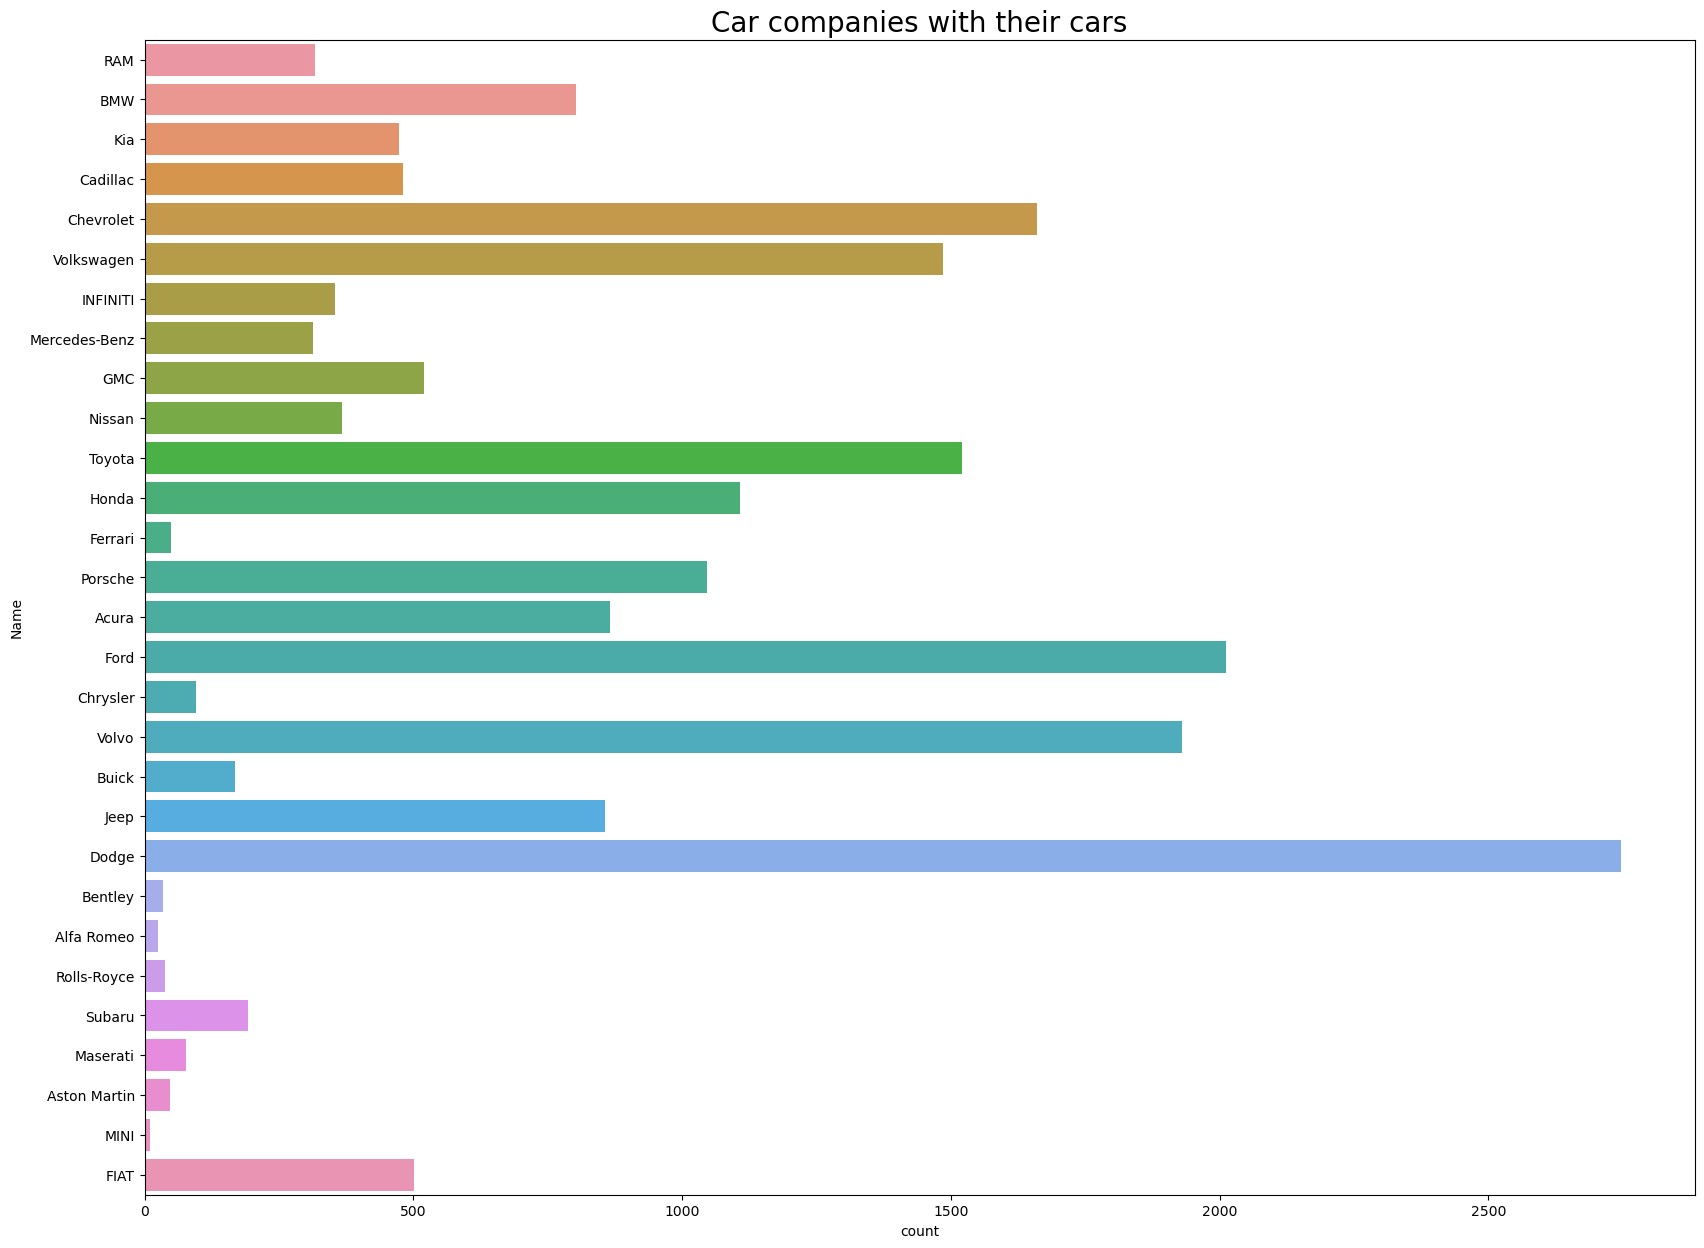

In [157]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.Name)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

In [164]:
df['Year'] = df['Year'].astype(int)

In [177]:
df['Name'] = df['Name'].astype('string')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20101 entries, 0 to 20100
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             20101 non-null  string
 1   Vehicle_details  20101 non-null  object
 2   Mileage          20101 non-null  object
 3   Rating           20101 non-null  object
 4   Rating-Count     20101 non-null  object
 5   Price            20101 non-null  object
 6   Deal-Status      20101 non-null  object
 7   Year             20101 non-null  int64 
 8   Status           20101 non-null  object
dtypes: int64(1), object(7), string(1)
memory usage: 1.4+ MB


In [186]:
df.Year.value_counts()

2020    7433
2021    4336
2019    4277
2022    2501
2017     734
2018     633
2016      66
2023      65
2015      23
2014      16
2013      10
2011       4
2012       2
2010       1
Name: Year, dtype: int64